#Building linear regression from scratch

In [ ]:
import numpy as np

Linear regression

In [ ]:
class Linear_Regression():
  # initiating the parameters
  def __init__(self, learning_rate, no_of_iterations): # hyperparameters
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    # number of training examples and number of features
    self.m, self.n = X.shape

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):
    Y_pred = self.predict(self.X)

    # calculating the gradients
    dw = -2 * (self.X.T).dot(self.Y - Y_pred) /self.m
    db = -2 * np.sum(self.Y - Y_pred) /self.m

    # updating the model parameters
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X):
    return(X.dot(self.w) + self.b) #returns the y_pred of all values

To modify the Linear_Regression class so that it continues updating parameters until a certain loss value is reached without specifying the number of iterations, you can use a while loop that checks the loss at each iteration. Here's the modified class:

In [ ]:
import numpy as np

class Linear_Regression1():
    # initiating the parameters
    def __init__(self, learning_rate, threshold_loss):
        # hyperparameters
        self.learning_rate = learning_rate
        self.threshold_loss = threshold_loss

    def fit(self, X, Y):
        # number of training examples and number of features
        self.m, self.n = X.shape

        # initiating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent
        iteration = 0
        current_loss = float('inf')  # Initialize with a large value

        while current_loss > self.threshold_loss:
            self.update_weights()
            current_loss = self.calculate_loss()
            iteration += 1

        print(f"Training stopped at iteration {iteration} due to loss convergence.")

    def update_weights(self):
        Y_pred = self.predict(self.X)

        # calculating the gradients
        dw = -2 * (self.X.T).dot(self.Y - Y_pred) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m

        # updating the model parameters
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b  # returns the y_pred of all values

    def calculate_loss(self):
        Y_pred = self.predict(self.X)
        loss = np.mean((self.Y - Y_pred) ** 2)  # Mean Squared Error
        return loss


Using Linear Regression model for prediction

In [ ]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/salary_data.csv')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
data.shape

(30, 2)

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# X = data['YearsExperience'].values
X = data.iloc[:,:-1].values
Y = data['Salary'].values          # Y = data.iloc[:,-1]

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=1)

In [ ]:
print(X_train)
print(X_train.shape)

[[ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]
(20, 1)


In [ ]:
print(Y_train)

[113812  39891  37731 105582  60150  81363  57081  54445 112635  46205
  66029  39343  67938 121872 122391  57189  64445  56957  55794  56642]


Training the Linear regressin model

In [ ]:
model = Linear_Regression(0.02,10000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
print('weight =', model.w)
print('bias =', model.b)

weight = [9158.13919873]
bias = 26137.240014196774


In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)

[ 74675.37776747  91160.02832519  61853.98288925  81086.07520659
  67348.86640849  88412.58656557 113139.56240215  44453.51841166
 105813.05104316  98486.53968418]


Visualizing the predicted & actual values

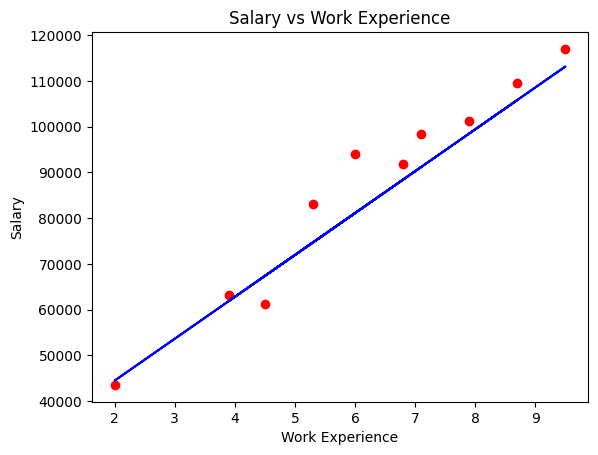

In [ ]:
plt.scatter(X_test,Y_test, color ='red')
plt.plot(X_test, test_pred, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work Experience')
plt.show()

#Building Logistic Regression from scratch


In [ ]:
import numpy as np

Logistic Regression

In [ ]:
class Logistic_Regression():

  def __init__(self, learning_rate, no_of_iterations): #hyperparameters
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):

    # m --> no. of datapoints (rows)
    # n --> no. of features (columns)
    self.m, self.n = X.shape

    # initialising weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_hat = 1/(1 + np.exp(-(self.X.dot(self.w) + self.b)))
    dw = (self.X.T).dot(Y_hat - self.Y) /self.m
    db = np.sum(Y_hat - self.Y) /self.m

    # updating weights and bias
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    Y_pred = 1/(1 + np.exp(-(X.dot(self.w) + self.b)))
    return np.where(Y_pred > 0.5, 1, 0)

Using the Model

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non - Diabetic

1 --> Diabetic

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X = data.drop(columns = 'Outcome', axis =1)
Y = data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X.stack().std() # std of the entire dataset comsidered as a 1D array

58.37772230378365

In [ ]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X.std()

1.0

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.1, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (691, 8) (77, 8)


Training the model

In [ ]:
model = Logistic_Regression(0.01, 1000)

In [ ]:
model.fit(X_train,Y_train)

Training Data Accuracy

In [ ]:
X_train_pred = model.predict(X_train)
train_accu = accuracy_score(Y_train, X_train_pred)
print('Training data accuracy =',train_accu*100)

Training data accuracy = 76.98986975397975


In [ ]:
X_test_pred = model.predict(X_test)
test_accu = accuracy_score(Y_test, X_test_pred)
print('Testing data accuracy =',test_accu*100)

Testing data accuracy = 79.22077922077922


Making a predictive  system

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input to numpy array
X_i = np.asarray(input_data)
print(X_i)

# reshape the array as we are predicting for instance
X_i = X_i.reshape(1,-1)

# standardize input data
X_i = Scaler.transform(X_i)
print(X_i)

prediction = model.predict(X_i)
print(prediction[0])
print('Not Diabetic' if prediction[0] == 0 else 'Diabetic')

[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
1
Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Building SVM Model from scratch

In [ ]:
import numpy as np

SVM Model

In [ ]:
class SVM_classifier():

  # initiating the hyperparameters
  def __init__(self,learning_rate,no_of_iterations,lam):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lam = lam

  # fitting the data to SVM Classifier
  def fit(self,X,Y):
    # m --> no. of datapoints (rows)
    # n --> no. of features (columns)
    self.m, self.n = X.shape

    # initiating weight and bias values
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)
    dw, db = np.zeros(self.n), 0
    for index,x_i in enumerate(self.X):
      condition = y_label[index] * (x_i.dot(self.w)-self.b) >= 1
      if(condition):
        dw = dw + 2*self.lam * self.w
        db = db + 0
      else:
        dw = dw + 2*self.lam * self.w - np.dot(x_i, y_label[index])
        db = db + y_label[index]

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    prediction = np.where(predicted_labels <=-1, 0, 1)
    return(prediction)


Using SVM for Diabetes prediction

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Not Diabetic

1 --> Diabetic

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X = data.drop(columns = 'Outcome', axis =1)
Y = data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X.stack().std() # std of the entire dataset comsidered as a 1D array

58.37772230378365

In [ ]:
Scaler = StandardScaler()
X =Scaler.fit_transform(X)

In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X.std()

1.0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.1, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (691, 8) (77, 8)


Training the model

In [ ]:
SVM = SVM_classifier(0.001,1000,0.01)

In [ ]:
SVM.fit(X_train,Y_train)

Training Data Accuracy

In [ ]:
train_prediction = SVM.predict(X_train)
train_accu = accuracy_score(Y_train, train_prediction)
print('Training data accuracy =',train_accu*100)

Training data accuracy = 77.42402315484804


Testing data accuracy

In [ ]:
test_prediction = SVM.predict(X_test)
test_accu = accuracy_score(Y_test, test_prediction)
print('Testing data accuracy =',test_accu*100)

Testing data accuracy = 76.62337662337663


Making a predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input to numpy array
X_i = np.asarray(input_data)
print(X_i)

# reshape the array as we are predicting for instance
X_i = X_i.reshape(1,-1)

# standardize input data
X_i = Scaler.transform(X_i)
print(X_i)

prediction = SVM.predict(X_i)
print(prediction[0])
print('Not Diabetic' if prediction[0] == 0 else 'Diabetic')

[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
1
Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Building Lasso Regression from scratch

In [ ]:
import numpy as np

Lasso regression

In [ ]:
class Lasso_regression():

  # initiating hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lam):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lam = lam

  def fit(self, X, Y):
    # m --> no. of datapoints (rows)
    # n --> no. of features (columns)
    self.m, self.n = X.shape

    # initiating weight and bias values
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_hat = self.predict(self.X)

    dw = np.zeros(self.n)

    # finding gradients
    db = -2 * np.sum(self.Y - y_hat) /self.m

    for j in range(self.n):

      if self.w[j]>0:
        dw[j] = -2 * ((self.X[:,j]).dot(self.Y - y_hat) + self.lam)/self.m
      else:
        dw[j] = -2 * ((self.X[:,j]).dot(self.Y - y_hat) - self.lam)/self.m

    # updating the model parameters
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    return (np.dot(X,self.w) + self.b)

#Calculating Euclidean and Manhattan Distance

In [ ]:
import numpy as np

Euclidean Distance

In [ ]:
p1 = (1,1)
p2 = (2,2)

In [ ]:
# calculating euclidean distance for 2D
d = (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2
euclidean_d = np.sqrt(d)
print(euclidean_d)

1.4142135623730951


In [ ]:
p1 = (1,1,1)
p2 = (2,2,2)

In [ ]:
# calculating euclidean distance for 3D
d = (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2
euclidean_d = np.sqrt(d)
print(euclidean_d)

1.7320508075688772


In [ ]:
p1 = (1,1,1,1)
p2 = (2,2,2,2)

dist = 0

for i in range(len(p1)):
  dist = dist + (p1[i]-p2[i])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

2.0


Creating a function for calculating euclidean distance

In [ ]:
def get_euclidean(p1, p2):
  dist = 0

  for i in range(len(p1)):
    dist = dist + (p1[i]-p2[i])**2

  euclidean_dist = np.sqrt(dist)
  return euclidean_dist

In [ ]:
print(get_euclidean((1,1,1),(3,3,3)))

3.4641016151377544


Manhattan Distance

In [ ]:
def get_manhattan(p1,p2):
  dist = 0

  for i in range(len(p1)):
    dist = dist + abs(p1[i]-p2[i])

  return dist

In [ ]:
print(get_manhattan((1,1,1),(3,3,3)))

6


#Building KNN from scratch

In [ ]:
import numpy as np
import statistics

K-Nearest Neighbors

In [ ]:
class KNN_classifier():

  def __init__(self,distance_metric):
    self.distance_metric =  distance_metric

  def get_dist_metric(self,training_data_point,testing_data_point):
    if(self.distance_metric == 'euclidean'):
      dist = 0
      for i in range(len(training_data_point)-1):
        dist = dist + (training_data_point[i]-testing_data_point[i])**2

      euclidean_dist = np.sqrt(dist)
      return euclidean_dist

    elif(self.distance_metric == 'manhattan'):
      manhattan_dist = 0
      for i in range(len(training_data_point)-1):
        manhattan_dist = manhattan_dist + abs(training_data_point[i]-testing_data_point[i])

      return manhattan_dist

  # getting the nearest neighbors

  def nearest_neighbors(self, X_train, test_data, k):
    distance_list = []

    for training_data in X_train:
      distance = self.get_dist_metric(training_data, test_data)
      distance_list.append((training_data,distance))

    distance_list.sort(key = lambda x:x[1])

    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list

  def predict(self,X_train,X_test,k):

    prediction = np.zeros(X_test.shape[0])
    for index,test_data in enumerate(X_test):
      neighbors = self.nearest_neighbors(X_train,test_data,k)
      label = []

      for data in neighbors:
        label.append(data[-1])

      prediction[index] = statistics.mode(label)

    return prediction


Diabetes Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# separating features and Target
X = diabetes_dataset.drop(columns='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [ ]:
# converting the data to numpy array
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
print(X_train)
print(Y_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 3.24e+01 1.41e-01 2.40e+01]
 [6.00e+00 1.05e+02 7.00e+01 ... 3.08e+01 1.22e-01 3.70e+01]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.01e+01 3.98e-01 5.90e+01]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [4.00e+00 1.12e+02 7.80e+01 ... 3.94e+01 2.36e-01 3.80e+01]
 [0.00e+00 8.60e+01 6.80e+01 ... 3.58e+01 2.38e-01 2.50e+01]]
[1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0

In [ ]:
X_train = np.insert(X_train, 8, Y_train, axis=1)

In [ ]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 1.41e-01 2.40e+01 1.00e+00]
 [6.00e+00 1.05e+02 7.00e+01 ... 1.22e-01 3.70e+01 0.00e+00]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.98e-01 5.90e+01 1.00e+00]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.00e-01 3.50e+01 0.00e+00]
 [4.00e+00 1.12e+02 7.80e+01 ... 2.36e-01 3.80e+01 0.00e+00]
 [0.00e+00 8.60e+01 6.80e+01 ... 2.38e-01 2.50e+01 0.00e+00]]


In [ ]:
X_train.shape

(614, 9)

In [ ]:
print(X_train[:,8])

[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.

X_train --> training data with features and target

X_test  --> test data without target

Model Training : KNN Classifier

In [ ]:
classifier = KNN_classifier(distance_metric='manhattan')

In [ ]:
prediction = classifier.predict(X_train, X_test, k=5)

In [ ]:
print(prediction)

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]


In [ ]:
y_true = Y_test

Model Evaluation

In [ ]:
accuracy = accuracy_score(y_true, prediction)

In [ ]:
print(accuracy*100)  # accuracy score in %

77.92207792207793
